In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

<div> 
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information. 

2. Sex: Indicates someone's gender. 

3. GeneralHealth: Describes someone's overall health condition. 

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition. 

6. LastCheckupTime: Contains the information of the last health check 

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health. 

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not. 

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not. 

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not. 

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not 

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not. 

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not. 

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not. 

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not. 

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not. 

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity. 

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual. 

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not. 

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not. 

39. HighRiskLastYear: Stores information about whether someone was in high risk or not. 

40. CovidPos: Stores information about whether someone had Covid or not. 

# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df2 = pd.read_csv("heart_2022_cleaned.csv")
# Display sample data
df2.head()

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,0,12,0,26.57,4,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,25.61,3,2,3,1,0,5,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,21.77,1,2,0,1,1,9,...,0,1,0,0,0,0,1,0,0,0
3,1,12,0,26.08,0,1,0,0,0,7,...,0,0,1,0,1,0,1,0,0,1
4,0,12,1,22.96,3,0,0,1,0,7,...,0,1,0,0,0,0,1,0,0,0


# 2. Exploring the Dataset

<Axes: >

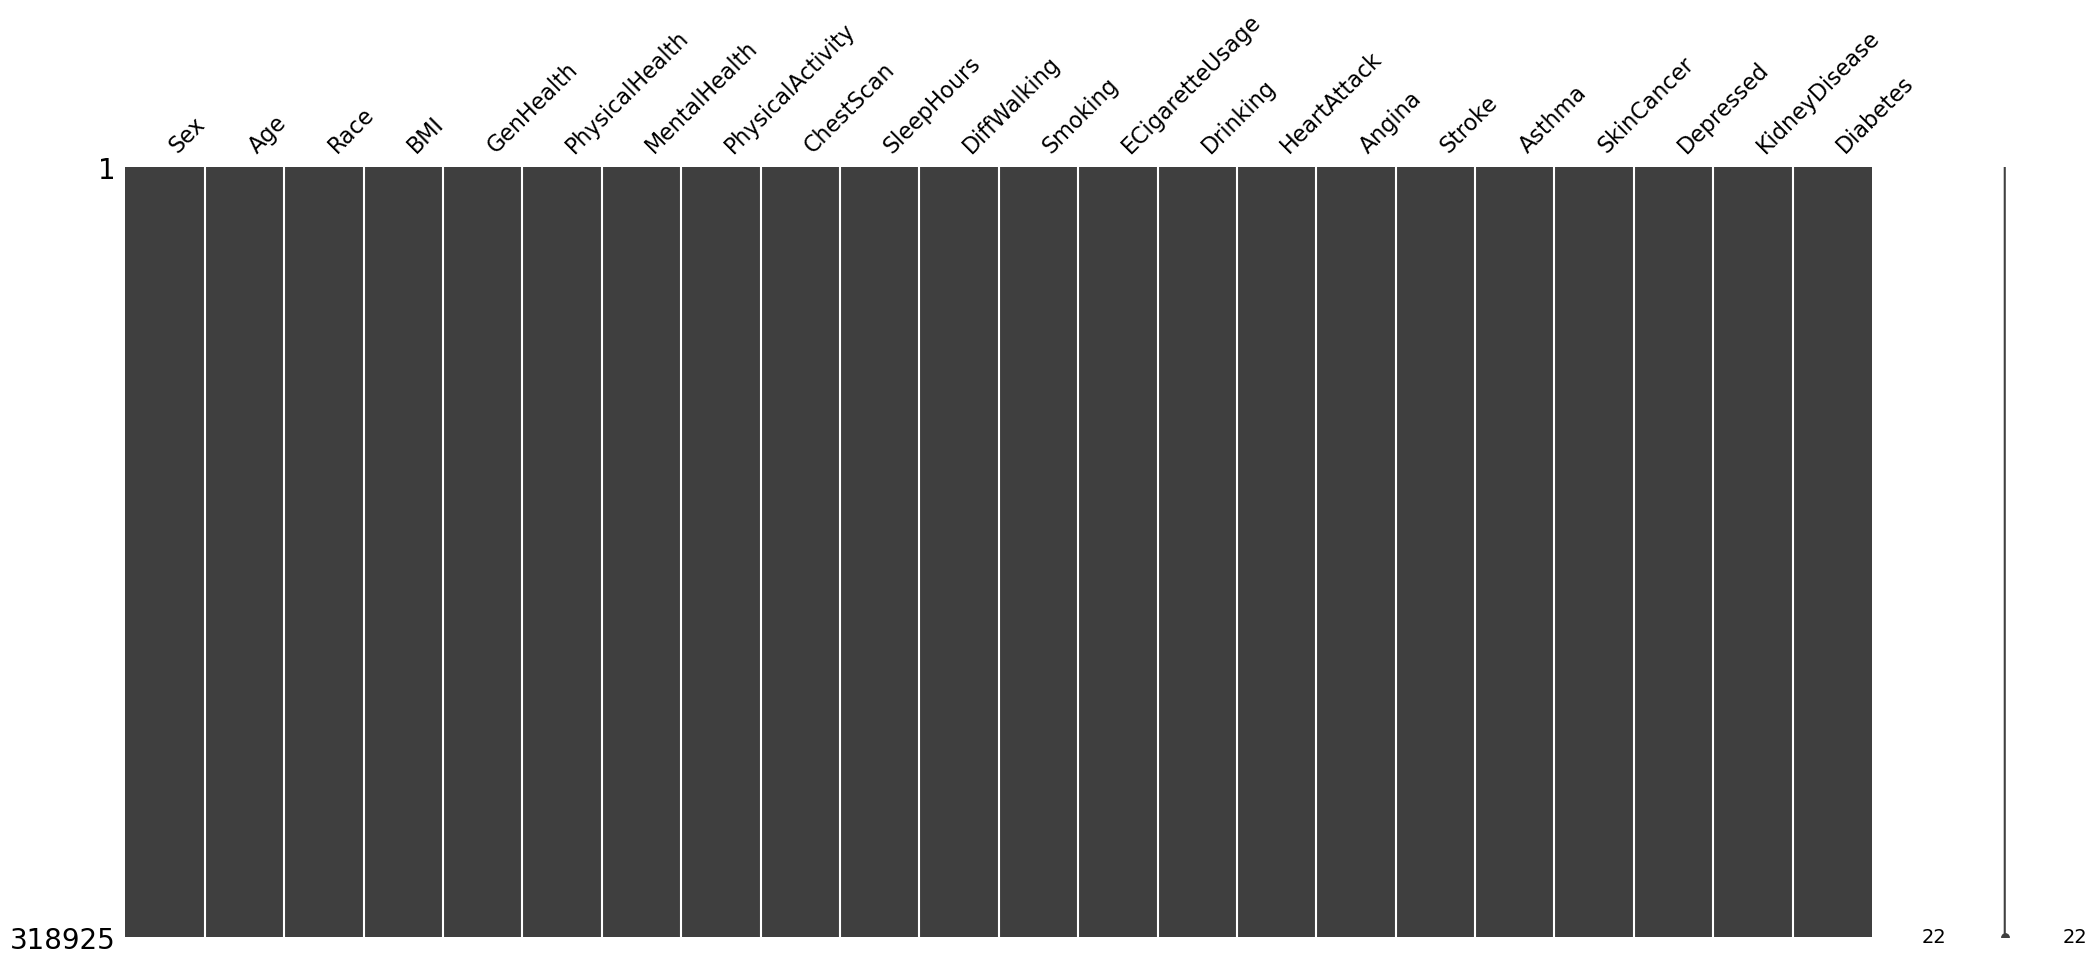

In [3]:
# Check he missing data
%matplotlib inline
msno.matrix(df2)

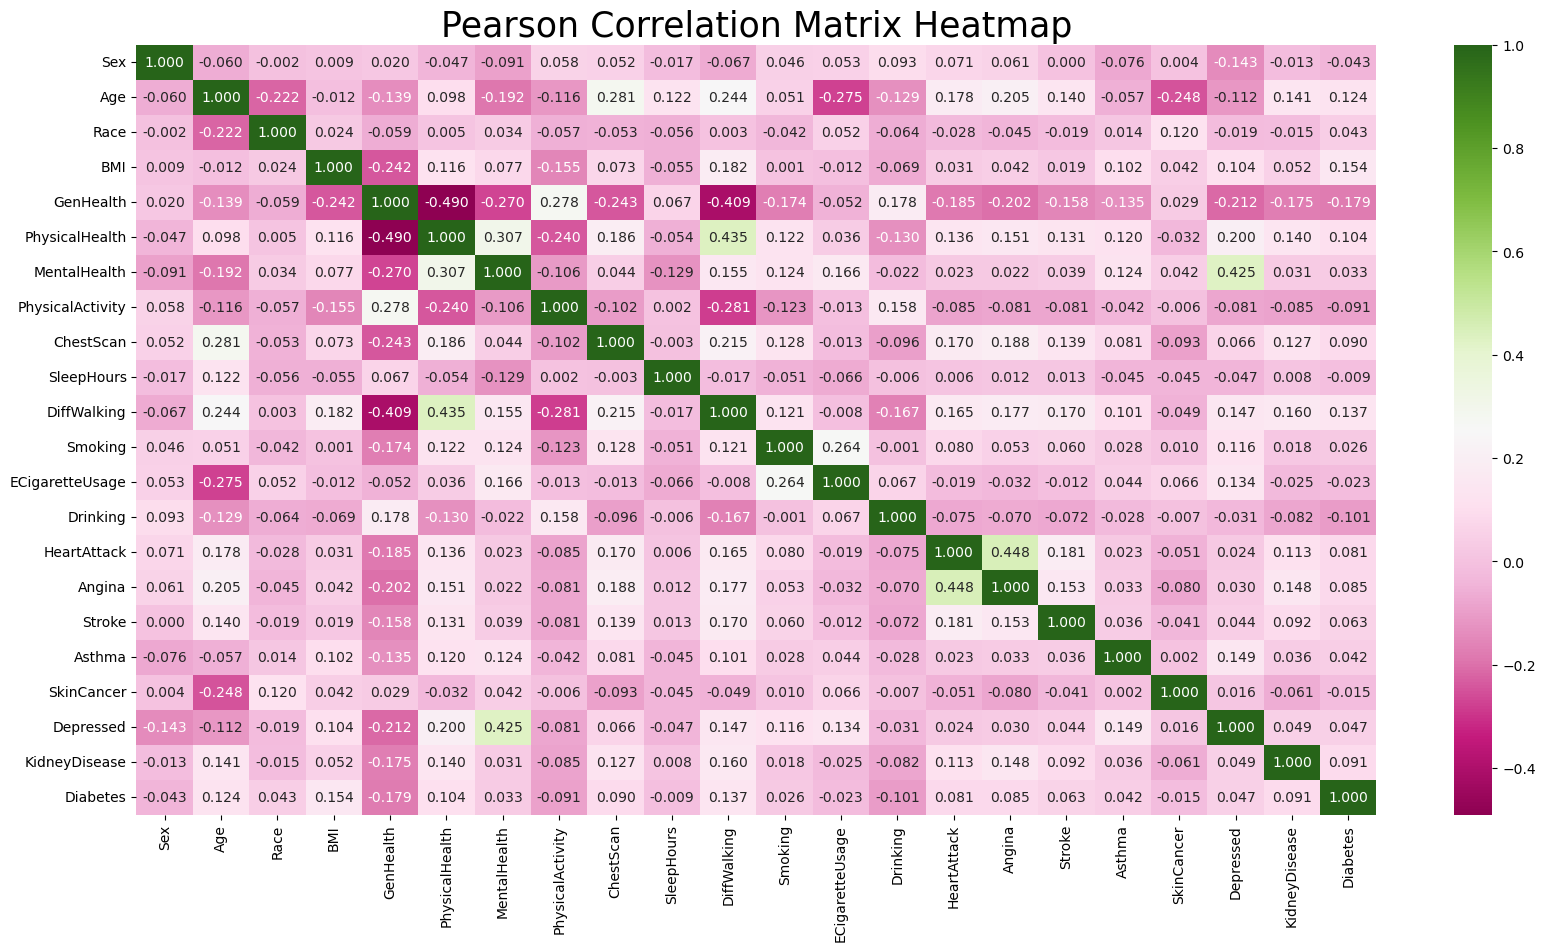

In [4]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [5]:
# Copy dataset for Machine Learning
df3 = df2.copy()

In [6]:
# Split the data into feature (X) and target variable (y)
X = df3.drop("HeartAttack", axis=1)
y = df3["HeartAttack"]

In [7]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=78)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78)

In [9]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

,y_test,prediction
89980,0,0
165372,0,0
259488,0,0
288996,0,0
94579,0,0
186681,0,0
142493,0,0
48696,0,0
55571,0,0
234539,0,0


##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[74671   824]
 [ 3175  1062]]


In [11]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.96      0.99      0.97     75495
     Yes (1)       0.56      0.25      0.35      4237

    accuracy                           0.95     79732
   macro avg       0.76      0.62      0.66     79732
weighted avg       0.94      0.95      0.94     79732



**Question:** How well does the logistic regression model predict both the `0` (No Heart Attack) and `1` (Had Heart Attack) labels?

**Answer:** When compared to the original dataset, there are more 'No' than 'Yes'. Even though, the model demonstrates a high accuracy of 95%. The precision score for 'No' is 96%, while the precision for 'Yes' is extremely low with 56%. Additionally, the recall score is 99% for predicting 'No' labels, but 26% for high-risk 'Yes'.

### 5.2. Deep Learning - Standard Scaler Module

In [12]:
# Copy dataset for Machine Learning
df4 = df2.copy()

In [13]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df4.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 3748
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            23
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [14]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df4["BMI"].value_counts()
bmi_counts

BMI
26.63    3438
27.46    2642
24.41    2601
27.44    2494
27.12    2468
         ... 
60.15       1
59.13       1
20.17       1
47.28       1
28.39       1
Name: count, Length: 3748, dtype: int64

In [15]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 150].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df4['BMI'] = df4['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df4['BMI'].value_counts()

BMI
Other    72173
26.63     3438
27.46     2642
24.41     2601
27.44     2494
         ...  
25.29      152
26.94      151
26.46      150
20.48      150
26.17      150
Name: count, Length: 451, dtype: int64

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df4 = pd.get_dummies(df4)
num_df4.head()

,Sex,Age,Race,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,DiffWalking,...,BMI_42.07,BMI_42.51,BMI_42.57,BMI_42.91,BMI_43.05,BMI_43.27,BMI_44.29,BMI_44.3,BMI_44.63,BMI_Other
0,0,12,0,4,0,0,0,0,6,0,...,False,False,False,False,False,False,False,False,False,False
1,0,7,0,3,2,3,1,0,5,0,...,False,False,False,False,False,False,False,False,False,False
2,0,4,0,1,2,0,1,1,9,0,...,False,False,False,False,False,False,False,False,False,False
3,1,12,0,0,1,0,0,0,7,0,...,False,False,False,False,False,False,False,False,False,True
4,0,12,1,3,0,0,1,0,7,0,...,False,False,False,False,False,False,False,False,False,False


In [17]:
X = num_df4.drop("HeartAttack", axis=1).values
y = num_df4["HeartAttack"].values

In [18]:
# # Split our preprocessed data into our features and target arrays
# y = num_df4["HeartAttack"].values
# X = num_df4.drop(columns="HeartAttack").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [19]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [20]:
import tensorflow as tf

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        37,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,801 (198.44 KB)

 Trainable params: 50,801 (198.44 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 5s 563us/step - accuracy: 0.9479 - loss: 0.1578
Epoch 2/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 508us/step - accuracy: 0.9498 - loss: 0.1418
Epoch 3/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 513us/step - accuracy: 0.9504 - loss: 0.1396
Epoch 4/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 513us/step - accuracy: 0.9503 - loss: 0.1418
Epoch 5/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 516us/step - accuracy: 0.9501 - loss: 0.1413
Epoch 6/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 519us/step - accuracy: 0.9518 - loss: 0.1387
Epoch 7/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 501us/step - accuracy: 0.9506 - loss: 0.1418
Epoch 8/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 526us/step - accuracy: 0.9520 - loss: 0.1386
Epoch 9/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 548us/step - accuracy: 0.9519 - loss: 0.1382
Epoch 10/10
7475/7475 ━━━━━━━━━━━━━━━━━━━━ 4s 590us/step - accuracy: 0.9513 - loss: 0.1415


In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2492/2492 - 1s - 270us/step - accuracy: 0.9491 - loss: 0.1476
Loss: 0.14755354821681976, Accuracy: 0.9490668773651123
